# Stellar Map Builder

**What this notebook shows**
- End-to-end exploratory analysis (loading, cleaning, EDA)
- Clear visual storytelling and interpretation

**Data**
- Local files: code/portfolio/stellar_mapper/bsc5.csv


## Step 1: Load CSV into Pandas DataFrame

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Load from the notebook folder if present; otherwise fall back to repo-relative path
csv_path = Path('bsc5.csv')
if not csv_path.exists():
    csv_path = Path('code/portfolio/stellar_mapper/bsc5.csv')

df = pd.read_csv(csv_path)

print(f"Total number of stars: {len(df)}")

Total number of stars: 9110


## Sanity Checks

In [3]:
df.shape

(9110, 33)

In [9]:
df.head(5)

,HR,Name,DM,HD,SAO,FK5,IRFlag,Multiple,ADS,VarName,...,DMag2,Orbit,Notes,ra_deg,dec_deg,ra_rad,dec_rad,glon_rad,glat_rad,color
0,1,NaN,BD+44 4550,3.0,36042.0,NaN,NaN,NaN,46.0,NaN,...,21.0,6.0,AC 3,1.291250,45.229167,0.022537,0.789398,1.997355,-0.294612,deepskyblue
1,2,NaN,BD-01 4525,6.0,128569.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.265833,-0.503056,0.022093,-0.008780,1.716182,-1.067094,black
2,3,33 Psc,BD-06 6357,28.0,128572.0,1002.0,I,NaN,NaN,Var?,...,0.0,0.0,3,1.333750,-5.707500,0.023278,-0.099615,1.636246,-1.150696,orange
3,4,86 Peg,BD+12 5063,87.0,91701.0,2004.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.425000,13.396111,0.024871,0.233806,1.853365,-0.837409,yellow
4,5,NaN,BD+57 2865,123.0,21085.0,NaN,NaN,NaN,61.0,V640 Cas,...,1.0,4.0,NaN,1.566667,58.436667,0.027343,1.019912,2.042559,-0.068417,yellow


In [10]:
df.tail(5)

,HR,Name,DM,HD,SAO,FK5,IRFlag,Multiple,ADS,VarName,...,DMag2,Orbit,Notes,ra_deg,dec_deg,ra_rad,dec_rad,glon_rad,glat_rad,color
9105,9106,NaN,CP-73 2346,225233.0,255629.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.127917,-72.897778,0.019686,-1.272306,-0.913156,-0.764454,green
9106,9107,NaN,BD+33 4828,225239.0,53622.0,2002.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.224167,34.659722,0.021366,0.604926,1.957736,-0.475428,yellow
9107,9108,NaN,CP-72 2800,225253.0,255631.0,1001.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.172083,-71.436944,0.020457,-1.246810,-0.904430,-0.789063,blue
9108,9109,NaN,BD+25 5068,225276.0,73731.0,NaN,I,NaN,42.0,NaN,...,17.0,5.0,NaN,1.233333,26.648889,0.021526,0.465111,1.923702,-0.612087,orange
9109,9110,NaN,BD+60 2667,225289.0,10962.0,NaN,NaN,NaN,NaN,V567 Cas,...,NaN,NaN,NaN,1.275833,61.314167,0.022267,1.070134,2.049017,-0.018500,blue


In [5]:
df.describe()

,HR,HD,SAO,FK5,ADS,RAh,RAm,RAs,DecD,DecM,...,UB,RI,PMRA,PMDec,Parallax,RadVel,RotVel,DMag1,DMag2,Orbit
count,9110.00000,9096.000000,9071.000000,3077.000000,1435.000000,9096.000000,9096.000000,9096.000000,9096.000000,9096.000000,...,7206.000000,2551.000000,9096.000000,9096.000000,3289.000000,9092.000000,3933.000000,2890.000000,2951.000000,2876.000000
mean,4555.50000,107334.581794,134193.509536,1954.447514,8278.804878,11.547274,29.765501,30.171284,33.916996,29.692062,...,0.374167,0.368491,0.001827,-0.019225,0.024512,0.593049,87.736079,3.537024,38.053880,3.955841
std,2629.97481,67739.321279,75516.511021,1209.016612,4700.699670,6.790622,17.197686,17.249091,21.235014,17.271153,...,0.804599,0.458768,0.163218,0.138356,0.032329,23.635129,83.446089,2.788965,70.576585,2.867957
min,1.00000,3.000000,106.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.110000,-0.530000,-3.646000,-5.813000,-0.032000,-140.000000,0.000000,0.000000,0.000000,0.000000
25%,2278.25000,44330.500000,71659.000000,820.000000,4154.500000,6.000000,15.000000,15.700000,16.000000,15.000000,...,-0.080000,0.020000,-0.024000,-0.031000,0.009000,-14.000000,19.000000,1.000000,1.000000,1.000000
50%,4555.50000,103449.500000,131443.000000,2104.000000,8406.000000,11.000000,30.000000,30.400000,33.000000,30.000000,...,0.100000,0.310000,-0.002000,-0.008000,0.018000,0.000000,60.000000,3.200000,10.000000,4.000000
75%,6832.75000,167648.750000,200666.500000,3046.000000,11822.500000,18.000000,45.000000,44.900000,50.000000,45.000000,...,0.880000,0.570000,0.020000,0.007000,0.032000,15.000000,132.000000,5.700000,41.500000,6.000000
max,9110.00000,225289.000000,258996.000000,3997.000000,17175.000000,23.000000,59.000000,59.900000,89.000000,59.000000,...,7.400000,3.710000,4.136000,3.208000,0.751000,289.000000,455.000000,13.800000,1480.000000,9.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9110 entries, 0 to 9109
Data columns (total 33 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   HR        9110 non-null   int64  
 1   Name      3157 non-null   object 
 2   DM        9096 non-null   object 
 3   HD        9096 non-null   float64
 4   SAO       9071 non-null   float64
 5   FK5       3077 non-null   float64
 6   IRFlag    1743 non-null   object 
 7   Multiple  1577 non-null   object 
 8   ADS       1435 non-null   float64
 9   VarName   2182 non-null   object 
 10  RAh       9096 non-null   float64
 11  RAm       9096 non-null   float64
 12  RAs       9096 non-null   float64
 13  DecSign   9096 non-null   object 
 14  DecD      9096 non-null   float64
 15  DecM      9096 non-null   float64
 16  DecS      9096 non-null   float64
 17  GLON      9096 non-null   float64
 18  GLAT      9096 non-null   float64
 19  Vmag      9096 non-null   float64
 20  BV        8786 non-null   floa

## Step 3: Convert RA and Dec to Decimal Degrees

In [6]:
import numpy as np
import pandas as pd

for col in ['RAh','RAm','RAs','DecD','DecM','DecS']:
    df[col] = pd.to_numeric(df[col], errors='coerce')


df['ra_deg'] = 15.0 * (df['RAh'].fillna(0) +
                       df['RAm'].fillna(0)/60.0 +
                       df['RAs'].fillna(0)/3600.0)

# Avoid Pandas replace downcasting warnings by using map + fillna
sign = df['DecSign'].fillna('+').map({'-': -1, '+': 1}).fillna(1).astype(int)
df['dec_deg'] = sign * (
    df['DecD'].fillna(0) +
    df['DecM'].fillna(0)/60.0 +
    df['DecS'].fillna(0)/3600.0
)

df['ra_rad']  = np.deg2rad(df['ra_deg'])
df['dec_rad'] = np.deg2rad(df['dec_deg'])

df['ra_rad'] = np.remainder(df['ra_rad'] + 2*np.pi, 2*np.pi)
df.loc[df['ra_rad'] > np.pi, 'ra_rad'] -= 2*np.pi

df['glon_rad'] = np.deg2rad(pd.to_numeric(df['GLON'], errors='coerce'))
df['glat_rad'] = np.deg2rad(pd.to_numeric(df['GLAT'], errors='coerce'))

df['glon_rad'] = np.remainder(df['glon_rad'] + 2*np.pi, 2*np.pi)
df.loc[df['glon_rad'] > np.pi, 'glon_rad'] -= 2*np.pi

## Step 4: Assign Colors by Spectral Type

In [7]:
def color_for_sptype(sptype):
    if isinstance(sptype, str):
        if sptype.startswith('O'): return 'darkviolet'
        elif sptype.startswith('B'): return 'blue'
        elif sptype.startswith('A'): return 'deepskyblue'
        elif sptype.startswith('F'): return 'green'
        elif sptype.startswith('G'): return 'yellow'
        elif sptype.startswith('K'): return 'orange'
        elif sptype.startswith('M'): return 'red'
    return 'black'

df['color'] = df['SpType'].apply(color_for_sptype)

## Step 5: Plot the Sky Map

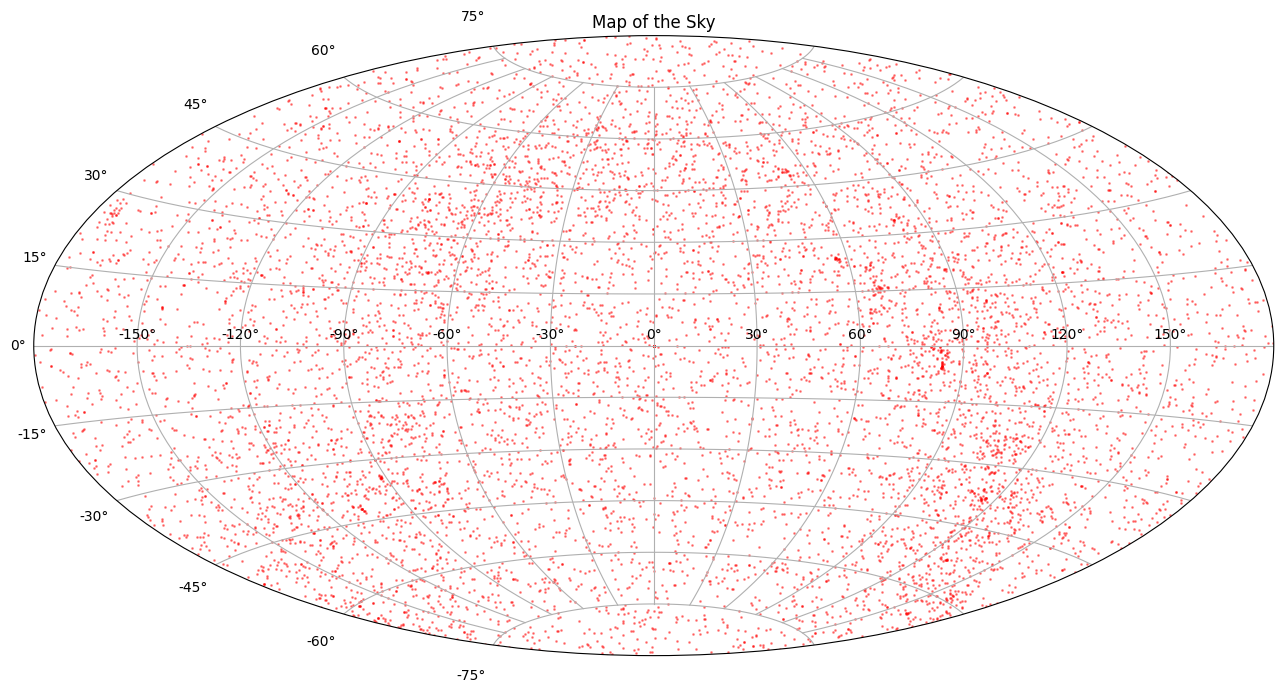

In [8]:
# Plot the real star positions using computed RA/Dec (Aitoff projection)
mask = np.isfinite(df['ra_rad']) & np.isfinite(df['dec_rad'])
plt.figure(figsize=(16, 8.4))
plt.subplot(projection='aitoff')
plt.title('Map of the Sky')
plt.scatter(df.loc[mask, 'ra_rad'], df.loc[mask, 'dec_rad'], s=1, alpha=0.4, c='r')
plt.grid(True)
plt.savefig('sky_map.pdf', bbox_inches='tight')
plt.show()

## Step 5a: All-Sky Map in Equatorial Coordinates

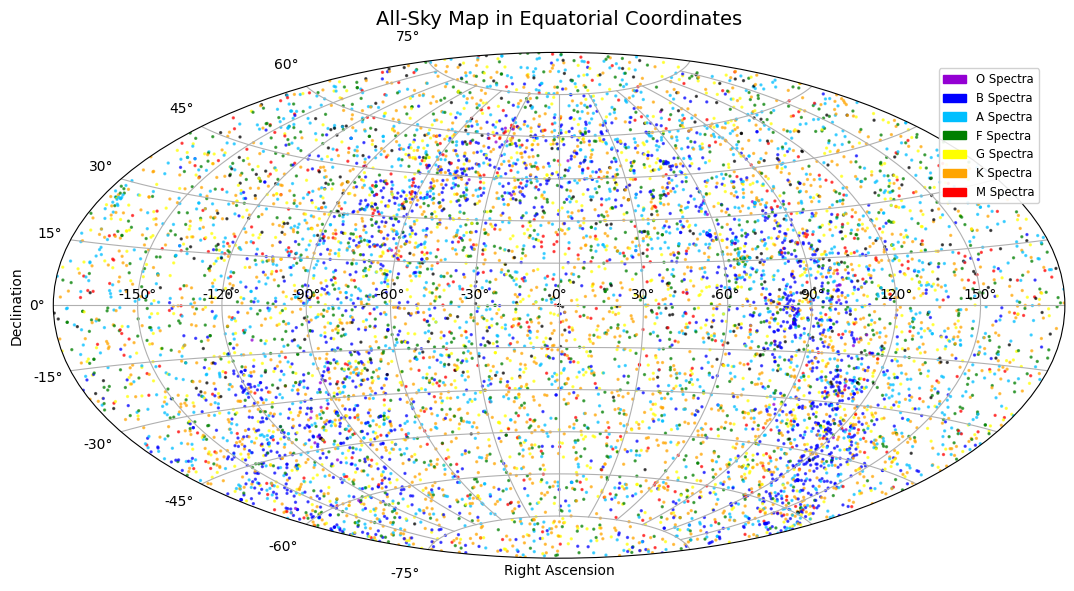

In [11]:
import matplotlib.patches as mpatches

df['ra_rad'] = np.remainder(df['ra_rad'] + 2*np.pi, 2*np.pi)
df.loc[df['ra_rad'] > np.pi, 'ra_rad'] -= 2*np.pi
mask = np.isfinite(df['ra_rad']) & np.isfinite(df['dec_rad'])

plt.figure(figsize=(12, 6))
plt.subplot(111, projection='aitoff')

plt.title("All-Sky Map in Equatorial Coordinates", fontsize=14, pad=20)
plt.scatter(df.loc[mask, 'ra_rad'], df.loc[mask, 'dec_rad'],
            s=2, c=df.loc[mask, 'color'], alpha=0.6)

plt.grid(True)
plt.xlabel("Right Ascension")
plt.ylabel("Declination")

legend_items = [
    mpatches.Patch(color='darkviolet', label='O Spectra'),
    mpatches.Patch(color='blue',        label='B Spectra'),
    mpatches.Patch(color='deepskyblue', label='A Spectra'),
    mpatches.Patch(color='green',       label='F Spectra'),
    mpatches.Patch(color='yellow',      label='G Spectra'),
    mpatches.Patch(color='orange',      label='K Spectra'),
    mpatches.Patch(color='red',         label='M Spectra')
]
plt.legend(handles=legend_items,
           loc='upper right', bbox_to_anchor=(0.98, 0.98),
           fontsize='small', frameon=True, framealpha=0.9)

plt.tight_layout()
plt.savefig("sky_map_equatorial.pdf", bbox_inches="tight")
plt.show()

## Step 5b: Create All-Sky Map in Galactic Coordinates

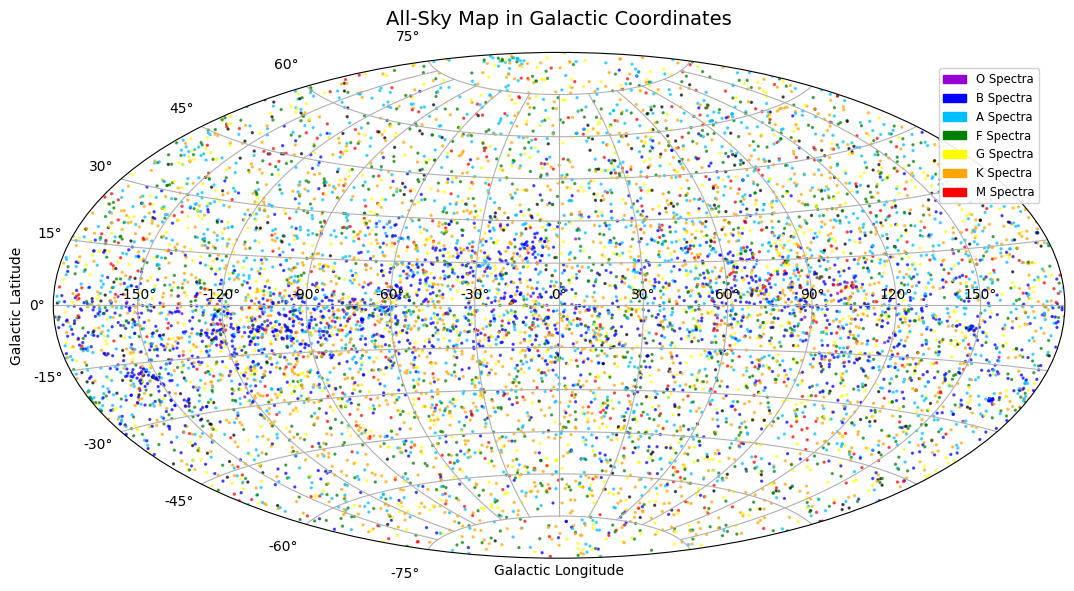

In [12]:
# Compute galactic radians if earlier step hasn't done it
if 'glon_rad' not in df.columns or 'glat_rad' not in df.columns:
    df['glon_rad'] = np.deg2rad(pd.to_numeric(df['GLON'], errors='coerce'))
    df['glat_rad'] = np.deg2rad(pd.to_numeric(df['GLAT'], errors='coerce'))

# Normalize longitude into [-pi, pi] for Aitoff projection
df['glon_rad'] = np.remainder(df['glon_rad'] + 2*np.pi, 2*np.pi)
df.loc[df['glon_rad'] > np.pi, 'glon_rad'] -= 2*np.pi
mask = np.isfinite(df['glon_rad']) & np.isfinite(df['glat_rad'])

plt.figure(figsize=(12, 6))
plt.subplot(111, projection='aitoff')

plt.title("All-Sky Map in Galactic Coordinates", fontsize=14, pad=20)
plt.scatter(df.loc[mask, 'glon_rad'], df.loc[mask, 'glat_rad'],
            s=2, c=df.loc[mask, 'color'], alpha=0.6)

plt.grid(True)
plt.xlabel("Galactic Longitude")
plt.ylabel("Galactic Latitude")

if 'legend_items' not in globals():
    import matplotlib.patches as mpatches
    legend_items = [
        mpatches.Patch(color='darkviolet', label='O Spectra'),
        mpatches.Patch(color='blue',        label='B Spectra'),
        mpatches.Patch(color='deepskyblue', label='A Spectra'),
        mpatches.Patch(color='green',       label='F Spectra'),
        mpatches.Patch(color='yellow',      label='G Spectra'),
        mpatches.Patch(color='orange',      label='K Spectra'),
        mpatches.Patch(color='red',         label='M Spectra')
    ]
plt.legend(handles=legend_items,
           loc='upper right', bbox_to_anchor=(0.98, 0.98),
           fontsize='small', frameon=True, framealpha=0.9)

plt.tight_layout()
plt.savefig("sky_map_galactic.pdf", bbox_inches="tight")
plt.show()

Notice the difference in the view of the sky in the two coordinate systems.

The Equatorial Map shows the sky using Earth’s view. It’s lined up with the Earth’s equator, so the Milky Way looks like a skewed group across the sky. On the other hand, the Galactic Map shows the sky using the Milky Way’s view. It’s lined up with our Galaxy, so the Milky Way runs straight across the middle. But both maps have the same stars. It is just that they just use different ways to draw the sky.

## Outputs
- [sky_map.pdf](sky_map.pdf)
- [sky_map_equatorial.pdf](sky_map_equatorial.pdf)
- [sky_map_galactic.pdf](sky_map_galactic.pdf)